In [3]:
# Install necessary libraries
!pip install ultralytics
!pip install pillow
!pip install transformers
!pip install smtplib
!pip install torch
!pip install opencv-python
!pip install -U ipywidgets
!pip install torch torchvision 
!pip install verovio
!pip install pytesseract
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 20.0 MB/s eta 0:00:0000:01
ERROR: Could not find a version that satisfies the requirement smtplib (from versions: none)
ERROR: No matching distribution found for smtplib
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
    

In [4]:
import cv2
import numpy as np
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
from transformers import AutoModel, AutoProcessor
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt
import torch
import sqlite3
from datetime import datetime

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import wandb
wandb.login(key="PUT YOUR API KEY HERE")


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
# from ultralytics import YOLO

# model = YOLO('yolov8s.pt')


# model.train(data='/kaggle/input/final-dataset-motorbikesdelivery/data.yaml', epochs=100)

# model.save('/kaggle/working/yolov8_motorbikes_detection_s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 186MB/s]


Ultralytics YOLOv8.2.102 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/final-dataset-motorbikesdelivery/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 37.3MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Currently logged in as: naser-saqerr (naser-saqerr-king-saud-university). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 183MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/final-dataset-motorbikesdelivery/train/labels... 5937 images, 186 backgrounds, 0 corrupt: 100%|██████████| 5937/5937 [00:18<00:00, 324.26it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/final-dataset-motorbikesdelivery/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 420, len(boxes) = 15975. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/final-dataset-motorbikesdelivery/valid/labels... 564 images, 22 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:01<00:00, 337.99it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/final-dataset-motorbikesdelivery/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 1667. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.14G      1.146      1.867      1.356          3        640: 100%|██████████| 372/372 [01:40<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.96it/s]


                   all        564       1667      0.672      0.345      0.362      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.93G      1.097      1.183      1.331          2        640: 100%|██████████| 372/372 [01:39<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]


                   all        564       1667      0.462      0.366      0.369      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.07G      1.099      1.152      1.332          3        640: 100%|██████████| 372/372 [01:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.444      0.319      0.335      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.97G      1.059      1.073      1.305          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        564       1667      0.497       0.38        0.4      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.97G       1.01      1.001      1.267          6        640: 100%|██████████| 372/372 [01:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]


                   all        564       1667      0.489      0.418       0.41      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.13G     0.9587     0.9258      1.238          2        640: 100%|██████████| 372/372 [01:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]


                   all        564       1667      0.646      0.415      0.423      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       4.1G     0.9265     0.8782      1.214          4        640: 100%|██████████| 372/372 [01:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667      0.497      0.456      0.432      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.89G     0.8953     0.8214      1.201          6        640: 100%|██████████| 372/372 [01:38<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.511      0.459      0.441      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.97G     0.8819     0.8038      1.187          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]

                   all        564       1667      0.559      0.606       0.47      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.13G     0.8505      0.775      1.165          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.456       0.64       0.46      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       4.1G     0.8391     0.7534      1.162          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        564       1667      0.536       0.64       0.48      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.11G     0.8118     0.7264      1.141          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        564       1667       0.53      0.488      0.486      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       4.1G     0.8034     0.7183      1.136          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.62it/s]


                   all        564       1667      0.568      0.656      0.492      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.08G     0.7915      0.703       1.13          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667       0.56      0.501      0.506      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.1G     0.7869     0.6915      1.128          8        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]

                   all        564       1667      0.619      0.651      0.532       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.94G     0.7684     0.6748      1.115          5        640: 100%|██████████| 372/372 [01:38<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        564       1667      0.548      0.493      0.484       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       4.1G     0.7637     0.6589      1.112          7        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667      0.527      0.493      0.476      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.94G     0.7578     0.6544      1.107          4        640: 100%|██████████| 372/372 [01:38<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]

                   all        564       1667      0.638      0.583      0.546      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.07G     0.7381     0.6313      1.094          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]


                   all        564       1667      0.612      0.683      0.545      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.05G     0.7379     0.6383      1.098          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667      0.599      0.468      0.508      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.12G     0.7179     0.6548      1.085          0        640: 100%|██████████| 372/372 [01:38<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        564       1667      0.511      0.498      0.475      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.1G     0.7108     0.6025      1.088          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]

                   all        564       1667      0.599      0.623      0.557      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.05G     0.7121     0.6046      1.082          3        640: 100%|██████████| 372/372 [01:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]

                   all        564       1667      0.565      0.678      0.531      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.12G     0.6968     0.5961      1.075          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        564       1667      0.569      0.686      0.519      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.12G     0.6858     0.5769       1.07          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]


                   all        564       1667      0.588      0.494      0.522      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.06G     0.6867     0.5755      1.069          6        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.599      0.509      0.533      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.12G     0.6809     0.5607       1.07          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        564       1667       0.58      0.486      0.507      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       4.1G     0.6768     0.5574      1.064          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667      0.651      0.668      0.578      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.11G     0.6674     0.5535       1.06         19        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.537      0.528      0.534      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.13G     0.6684     0.5572      1.058          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        564       1667      0.584      0.644       0.68      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.05G     0.6559     0.5348      1.047          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        564       1667      0.608      0.657      0.658      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       4.1G     0.6532     0.5388      1.052          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        564       1667      0.671      0.674      0.617      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.11G     0.6517     0.5311      1.048          6        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.589      0.688      0.686      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       4.1G     0.6423     0.5235      1.045          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        564       1667       0.58      0.674      0.558      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.13G     0.6421     0.5265      1.048          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667      0.741      0.579      0.688      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.95G     0.6363     0.5123      1.039         11        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.791      0.558      0.704      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       4.1G     0.6239     0.5044      1.036          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]


                   all        564       1667      0.573      0.693      0.609      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.94G      0.621     0.5006      1.034          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]

                   all        564       1667      0.752       0.61      0.699      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.11G     0.6177     0.4964      1.029          9        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.633       0.67      0.615      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       4.1G     0.6126     0.4961      1.027          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        564       1667      0.618       0.68      0.576       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.95G     0.6146     0.4948      1.029          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        564       1667      0.646      0.656      0.697      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.05G     0.6072     0.4797      1.024          8        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        564       1667       0.69      0.556      0.592      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.09G     0.6028     0.4826      1.022          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        564       1667      0.601      0.663      0.682      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.12G     0.6007     0.4762      1.022          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.648      0.659      0.688      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.12G     0.5884     0.4646      1.016          6        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]


                   all        564       1667      0.659      0.614      0.654      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.09G     0.5784     0.4533      1.011          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        564       1667      0.594      0.668      0.683      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       4.1G     0.5837     0.4625      1.014          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.691      0.638      0.681      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.97G     0.5729     0.4459      1.006          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.652      0.665      0.699      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.13G     0.5756     0.4549      1.008          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.77it/s]

                   all        564       1667      0.787      0.564      0.693      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.95G     0.5676     0.4448      1.002         15        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.816      0.558        0.7      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.08G     0.5584     0.4394     0.9992          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.729      0.571      0.694      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.12G     0.5631     0.4349     0.9993          7        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        564       1667      0.704      0.618      0.695      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.07G     0.5611     0.4343     0.9986          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        564       1667      0.739      0.608       0.69      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       4.1G     0.5579     0.4335     0.9966          9        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        564       1667      0.682      0.627      0.675      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.11G     0.5458      0.424     0.9916         12        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        564       1667      0.645      0.651      0.689      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.11G     0.5445     0.4174     0.9953          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        564       1667      0.706       0.64      0.695      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.11G     0.5461     0.4234     0.9911          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667       0.71      0.616      0.691      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.14G     0.5359     0.4113      0.987         10        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667        0.7      0.627      0.688       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.12G     0.5417     0.4137     0.9866         12        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        564       1667      0.615      0.644       0.68      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.05G     0.5274     0.4074     0.9846          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.76it/s]

                   all        564       1667      0.709      0.637       0.69      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.94G     0.5291     0.4024     0.9811          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]


                   all        564       1667      0.696      0.636      0.694      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       3.9G     0.5249     0.4026     0.9815         16        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.667      0.655      0.692      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.11G     0.5193     0.3912     0.9778          6        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.74it/s]

                   all        564       1667      0.638      0.654      0.685      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.11G     0.5172     0.3925     0.9777          8        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        564       1667      0.732       0.64       0.69      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.97G     0.5187     0.3924      0.978          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        564       1667      0.749      0.599        0.7      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.05G     0.5166     0.3898     0.9737          7        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]

                   all        564       1667      0.741      0.597      0.689      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.94G      0.497     0.3765     0.9717          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]

                   all        564       1667      0.752      0.621      0.696      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       4.1G     0.5029     0.3765     0.9693          8        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]

                   all        564       1667      0.644      0.671      0.696      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       4.1G     0.5007     0.3815     0.9679         11        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        564       1667      0.694      0.677      0.689      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       4.1G     0.4907     0.3707     0.9663          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        564       1667      0.742      0.636        0.7      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.12G      0.492     0.3711     0.9649         10        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        564       1667      0.769      0.634      0.705       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.12G     0.4947     0.3694     0.9655          7        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.743      0.623      0.697      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.93G      0.485     0.4035     0.9598          0        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.728       0.64        0.7      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.05G     0.4851      0.363     0.9656          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667       0.73      0.652      0.704      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.89G     0.4808      0.361     0.9594          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667       0.75       0.62      0.701      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.05G     0.4796     0.3578     0.9596          6        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.62it/s]

                   all        564       1667      0.676      0.675      0.703      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       4.1G     0.4813     0.3663     0.9655          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        564       1667      0.812      0.535      0.698      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.95G     0.4693     0.3534     0.9534          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        564       1667       0.71       0.64      0.691      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       4.1G      0.474     0.3615     0.9595          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        564       1667       0.69      0.654      0.695      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       4.1G     0.4689     0.3487     0.9539          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.777      0.618      0.703      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.11G     0.4714     0.3489     0.9549          3        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        564       1667      0.828      0.534      0.703      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.94G     0.4571     0.3388     0.9516          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.78it/s]

                   all        564       1667       0.78      0.635      0.712      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.13G     0.4629     0.3457     0.9498          4        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        564       1667      0.745      0.646      0.712       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.94G     0.4547     0.3378      0.948          6        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667       0.79      0.637      0.709      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.11G     0.4542     0.3351     0.9475          6        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]


                   all        564       1667      0.785      0.636      0.709      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       4.1G     0.4488     0.3316     0.9447          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        564       1667      0.782      0.634      0.712      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       4.1G      0.445     0.3289     0.9456          5        640: 100%|██████████| 372/372 [01:37<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667      0.739      0.654      0.709      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.11G     0.4545     0.3346     0.9479          2        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.767      0.631      0.708      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       4.1G     0.4432     0.3315     0.9433          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.696      0.666      0.702       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.11G     0.4371     0.3217     0.9405          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        564       1667      0.745       0.65      0.702      0.471


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.05G     0.4363     0.2888      0.911          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        564       1667      0.776      0.627      0.702      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.08G      0.419     0.2836      0.896          0        640: 100%|██████████| 372/372 [01:36<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.702      0.665       0.71      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.08G     0.4183     0.2709     0.8965          3        640: 100%|██████████| 372/372 [01:36<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.789      0.609      0.713      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.12G     0.4128     0.2678     0.8968          3        640: 100%|██████████| 372/372 [01:36<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        564       1667      0.772      0.625      0.709      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.07G     0.4095     0.2634     0.8944          3        640: 100%|██████████| 372/372 [01:36<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]


                   all        564       1667      0.759      0.628      0.711      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       4.1G     0.4107     0.2608     0.8947          3        640: 100%|██████████| 372/372 [01:36<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.747      0.635      0.704      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.09G     0.4087     0.2624     0.9016          3        640: 100%|██████████| 372/372 [01:36<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        564       1667      0.733      0.654      0.708      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.14G     0.3956     0.2537     0.8869          3        640: 100%|██████████| 372/372 [01:36<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        564       1667      0.715      0.662       0.71      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.08G     0.4022     0.2554      0.888          1        640: 100%|██████████| 372/372 [01:37<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        564       1667      0.715      0.655      0.704      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.09G     0.3994     0.2563     0.8928          3        640: 100%|██████████| 372/372 [01:36<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        564       1667      0.712      0.654      0.706      0.457



100 epochs completed in 2.884 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.102 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.07it/s]


                   all        564       1667      0.746      0.646      0.711       0.49
                Helmet        394        427      0.871      0.523      0.624      0.346
         License_plate        161        164      0.735       0.72      0.774      0.621
     MotorbikeDelivery        465        518      0.877      0.763       0.82      0.544
        MotorbikeSport          1          1      0.456          1      0.995      0.895
             No_Helmet         43         66      0.677      0.286       0.33      0.167
                Person        390        491      0.862      0.585      0.724      0.369
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


In [6]:
model.val()

Ultralytics YOLOv8.2.102 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/input/final-dataset-motorbikesdelivery/valid/labels... 564 images, 22 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<00:00, 593.77it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/final-dataset-motorbikesdelivery/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 1667. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:08<00:00,  4.36it/s]


                   all        564       1667      0.746      0.646      0.712       0.49
                Helmet        394        427      0.875      0.524      0.628      0.347
         License_plate        161        164      0.731       0.72      0.774      0.621
     MotorbikeDelivery        465        518      0.878      0.763      0.819      0.544
        MotorbikeSport          1          1      0.455          1      0.995      0.895
             No_Helmet         43         66      0.677      0.286       0.33      0.162
                Person        390        491      0.859      0.585      0.724      0.369
Speed: 0.2ms preprocess, 9.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b9dace0a530>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [5]:
# from ultralytics import YOLO

# model = YOLO('/kaggle/input/khaled-model-yolov8/yolov8_Medium.pt')


## test video quick fot your model

In [9]:
from ultralytics import YOLO
import cv2

# Load the YOLOv8 model


# Load the video with .MOV extension
video_path = "/kaggle/input/videos-from-faris/IMG_2090.MOV"
cap = cv2.VideoCapture(video_path)

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Could not open the video file.")
    exit()

class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}
# Get video dimensions and create VideoWriter object
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify codec for MP4 output
output_path = '/kaggle/working/output_vid.mp4'  # Output video path
out = cv2.VideoWriter(output_path, fourcc, 30, (width, height))  # Adjust FPS as needed

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 inference on the frame
    results = model(frame)

    # Loop through each detection in the results
    boxes = results[0].boxes  # Get the detected boxes
    for box in boxes:
        # Get box coordinates (x1, y1, x2, y2) and convert to integers
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        color = class_colors[int(box.cls)]  # Get color based on class ID


        # Draw the bounding box on the frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)  # Green box with 2 thickness

        # Get class name and confidence
        class_name = model.names[int(box.cls)]
        conf = box.conf[0]

        # Put class name and confidence on the frame
        label = f'{class_name} {conf:.2f}'
        
                
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 3)

    # Write the processed frame to the output video
    out.write(frame)

# Release video capture and writer resources
cap.release()
out.release()


0: 384x640 (no detections), 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 2.9ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 2.9ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 3.0ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 3.0ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 3.1ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 2.9ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 3.0ms preprocess, 10.8ms i

## see the quality of picture

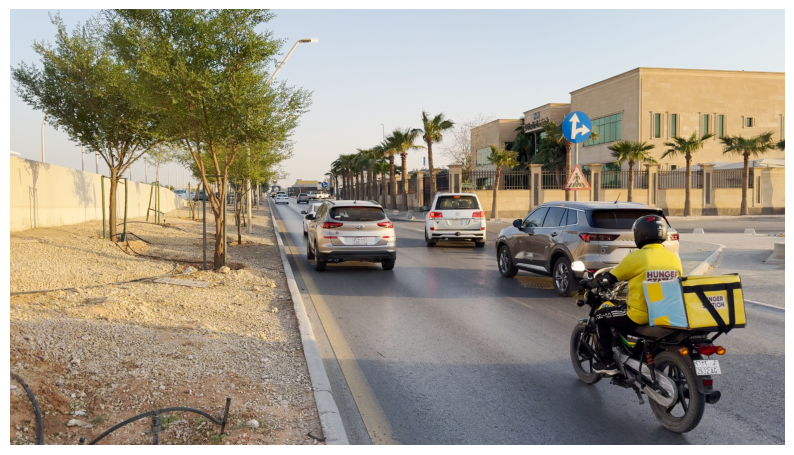

In [22]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load the original image using OpenCV
image_path = "/kaggle/input/motorbike-delivery-down/Screenshot (103).png"
original_img = cv2.imread(image_path)

# Convert the image to RGB for displaying in Matplotlib
rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Display the high-resolution image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_img)
plt.axis('off')
plt.show()


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



0: 384x640 1 Helmet, 1 License_plate, 1 MotorbikeDelivery, 1 Person, 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Violation detected: in_red_lane. Image saved at /kaggle/working/violation.jpg.
No license plate detected, email not sent.
Helmet is being worn.
Motorbike is in the red lane (violation).


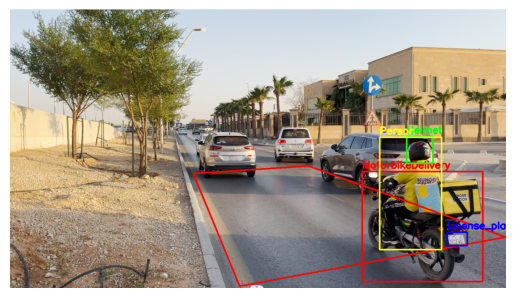

In [52]:
# Email credentials
FROM_EMAIL = "gggg@gmail.com"
EMAIL_PASSWORD = "from yout account in email website" # Use App-Specific Password here
TO_EMAIL = "gggg@gmail.com"
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465

# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}

class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}

# Connect to SQLite Database
conn = sqlite3.connect('motorbike_detections.db')
cursor = conn.cursor()

# Create the MotorbikeDetections table with required fields
cursor.execute('''
CREATE TABLE IF NOT EXISTS MotorbikeDetections (
    DetectionID INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATE NOT NULL,
    Time TIME NOT NULL,
    City VARCHAR(100),
    LicenseNumber VARCHAR(50),
    LicenseLetters VARCHAR(50),
    LaneViolation BOOLEAN NOT NULL,
    NoHelmet BOOLEAN NOT NULL,
    ImageLink VARCHAR(255)
)
''')

# Function to save detection data to the database
def save_detection_to_db(city, license_number, license_letters, lane_violation, no_helmet, image_link):
    date = datetime.now().strftime('%Y-%m-%d')
    time = datetime.now().strftime('%H:%M:%S')
    data = {
        'date': date,
        'time': time,
        'city': city,
        'license_number': license_number,
        'license_letters': license_letters,
        'lane_violation': int(lane_violation),  # Store as 1 or 0
        'no_helmet': int(no_helmet),            # Store as 1 or 0
        'image_link': image_link
    }
    
    cursor.execute('''
        INSERT INTO MotorbikeDetections (Date, Time, City, LicenseNumber, LicenseLetters, LaneViolation, NoHelmet, ImageLink)
        VALUES (:date, :time, :city, :license_number, :license_letters, :lane_violation, :no_helmet, :image_link)
    ''', data)
    conn.commit()
    print(f"Detection saved to database: {license_number}, {license_letters}")

# Load the OCR model
# processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True)
# model_ocr = AutoModel.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True).to('cuda')
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
model_ocr = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed").to('cuda')


# Function to filter license plate text
def filter_license_plate_text(license_plate_text):
    license_plate_text = re.sub(r'[^A-Z0-9]+', "", license_plate_text.upper())
    match = re.search(r'(\d{4})([A-Z]{2})', license_plate_text)
    return f"{match.group(1)} {match.group(2)}" if match else None

# Function to convert text to Arabic
def convert_to_arabic(license_plate_text):
    return "".join(arabic_dict.get(char, char) for char in license_plate_text)

# Function to send email notification with image attachment
def send_email(license_text, violation_image_path, violation_type):
    if violation_type == 'no_helmet':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة'
        body = f"لعدم ارتداء الخوذة ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'in_red_lane':
        subject = 'تنبيه مخالفة: دخول المسار الأيسر'
        body = f"لدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'no_helmet_in_red_lane':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة ودخول المسار الأيسر'
        body = f"لعدم ارتداء الخوذة ولدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"

    msg = MIMEMultipart()
    msg['From'] = FROM_EMAIL
    msg['To'] = TO_EMAIL
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    if os.path.exists(violation_image_path):
        with open(violation_image_path, 'rb') as attachment_file:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment_file.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(violation_image_path)}')
            msg.attach(part)

    with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
        server.login(FROM_EMAIL, EMAIL_PASSWORD)
        server.sendmail(FROM_EMAIL, TO_EMAIL, msg.as_string())
        print("Email with attachment sent successfully!")

def draw_text_pil(img, text, position, font_path, font_size, color):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)

    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()

    draw.text(position, text, font=font, fill=color)
    img_np = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return img_np

# Load YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')

# Load image
image = cv2.imread('/kaggle/input/test-down-2-png-2-38-mb/test down 2.png')

# Define the red lane polygon
# red_lane = np.array([[0, 2050], [2200, 2000], [2100, 800], [200, 800]], np.int32)
# red_lane = np.array([[1,1069], [1304,1070], [1179,230], [1,196]], np.int32)
# red_lane = np.array([[670,841], [569,519], [822,504], [1504,827]], np.int32)
red_lane = np.array([[697,841], [556,499], [906,476], [1504,692]], np.int32)




# Draw lane polygons
cv2.polylines(image, [red_lane], isClosed=True, color=(0, 0, 255), thickness=3)

font_path = "/kaggle/input/fontss/alfont_com_arial-1.ttf"
# Perform detection using YOLO

results = model.track(image)

# Initialize variables
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_text = False
filtered_text = False
violation_image_path = '/kaggle/working/violation.jpg'
city = 'Riyadh'  # Assuming city is Riyadh for now

# Process detection results
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]
    color = class_colors[int(box.cls)]

    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    if label == 'Helmet':
        helmet_detected = True
    elif label == 'No_Helmet':
        no_helmet_detected = True

    motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
    if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
        in_red_lane = True

    if label == 'License_plate':
        license_plate_img = image[y1:y2, x1:x2]
        license_plate_pil = Image.fromarray(cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2RGB))
        temp_image_path = '/kaggle/working/license_plate.png'
        license_plate_pil.save(temp_image_path)

        # Perform OCR on the license plate image using TrOCR
        pixel_values = processor(images=license_plate_pil, return_tensors="pt").pixel_values.to('cuda')
        generated_ids = model_ocr.generate(pixel_values, max_new_tokens=50)
        license_plate_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)[0]

        # Filter and convert the license plate text to Arabic
        filtered_text = filter_license_plate_text(license_plate_text)

        if filtered_text:
            arabic_text = convert_to_arabic(filtered_text)
            license_number, license_letters = filtered_text.split()
            image = draw_text_pil(image, filtered_text, (x1, y2 + 30), font_path, font_size=30, color=(255, 255, 255))
            image = draw_text_pil(image, arabic_text, (x1, y2), font_path, font_size=30, color=(0, 255, 0))

# Determine violation type
violation_type = None
if no_helmet_detected and in_red_lane:
    violation_type = 'no_helmet_in_red_lane'
elif no_helmet_detected:
    violation_type = 'no_helmet'
elif in_red_lane:
    violation_type = 'in_red_lane'

if violation_type:
    cv2.imwrite(violation_image_path, image)
    print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")

    if filtered_text:
        save_detection_to_db(city, license_number, license_letters, in_red_lane, no_helmet_detected, violation_image_path)
        send_email(filtered_text + " / " + arabic_text, violation_image_path, violation_type)
    else:
        print("No license plate detected, email not sent.")
else:
    print("No violation detected.")

if helmet_detected:
    print("Helmet is being worn.")
if no_helmet_detected:
    print("No helmet is being worn.")
if in_red_lane:
    print("Motorbike is in the red lane (violation).")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



0: 384x640 1 Helmet, 1 License_plate, 1 MotorbikeDelivery, 1 Person, 12.3ms
Speed: 2.4ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Violation detected: in_red_lane. Image saved at /kaggle/working/violation.jpg.
No license plate detected, email not sent.
Helmet is being worn.
Motorbike is in the red lane (violation).


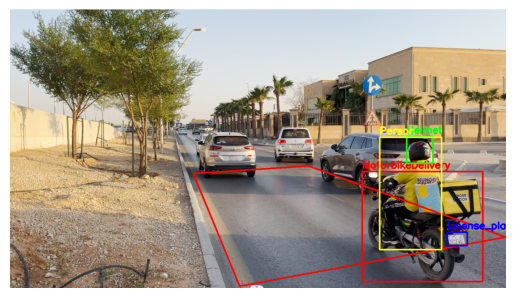

In [61]:
import cv2
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image, ImageDraw, ImageFont
import sqlite3
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
import re
import torch
from datetime import datetime

# Email credentials
FROM_EMAIL = "nalsaqer56@gmail.com"
EMAIL_PASSWORD = "nmapwnecdxuhzzry"  # Use App-Specific Password here
TO_EMAIL = "nalsaqer56@gmail.com"
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465

# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}

class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}

# Connect to SQLite Database
conn = sqlite3.connect('motorbike_detections.db')
cursor = conn.cursor()

# Create the MotorbikeDetections table with required fields
cursor.execute('''
CREATE TABLE IF NOT EXISTS MotorbikeDetections (
    DetectionID INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATE NOT NULL,
    Time TIME NOT NULL,
    City VARCHAR(100),
    LicenseNumber VARCHAR(50),
    LicenseLetters VARCHAR(50),
    LaneViolation BOOLEAN NOT NULL,
    NoHelmet BOOLEAN NOT NULL,
    ImageLink VARCHAR(255)
)
''')

# Function to save detection data to the database
def save_detection_to_db(city, license_number, license_letters, lane_violation, no_helmet, image_link):
    date = datetime.now().strftime('%Y-%m-%d')
    time = datetime.now().strftime('%H:%M:%S')
    data = {
        'date': date,
        'time': time,
        'city': city,
        'license_number': license_number,
        'license_letters': license_letters,
        'lane_violation': int(lane_violation),  # Store as 1 or 0
        'no_helmet': int(no_helmet),            # Store as 1 or 0
        'image_link': image_link
    }
    
    cursor.execute('''
        INSERT INTO MotorbikeDetections (Date, Time, City, LicenseNumber, LicenseLetters, LaneViolation, NoHelmet, ImageLink)
        VALUES (:date, :time, :city, :license_number, :license_letters, :lane_violation, :no_helmet, :image_link)
    ''', data)
    conn.commit()
    print(f"Detection saved to database: {license_number}, {license_letters}")

# Load the OCR model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
model_ocr = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed").to('cuda')

# Function to filter license plate text
def filter_license_plate_text(license_plate_text):
    license_plate_text = re.sub(r'[^A-Z0-9]+', "", license_plate_text.upper())
    match = re.search(r'(\d{4})([A-Z]{2})', license_plate_text)
    return f"{match.group(1)} {match.group(2)}" if match else None

# Function to convert text to Arabic
def convert_to_arabic(license_plate_text):
    return "".join(arabic_dict.get(char, char) for char in license_plate_text)

# Function to sharpen the image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Function to apply adaptive thresholding
def apply_threshold(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Function to send email notification with image attachment
def send_email(license_text, violation_image_path, violation_type):
    if violation_type == 'no_helmet':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة'
        body = f"لعدم ارتداء الخوذة ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'in_red_lane':
        subject = 'تنبيه مخالفة: دخول المسار الأيسر'
        body = f"لدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'no_helmet_in_red_lane':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة ودخول المسار الأيسر'
        body = f"لعدم ارتداء الخوذة ولدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"

    msg = MIMEMultipart()
    msg['From'] = FROM_EMAIL
    msg['To'] = TO_EMAIL
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    if os.path.exists(violation_image_path):
        with open(violation_image_path, 'rb') as attachment_file:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment_file.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(violation_image_path)}')
            msg.attach(part)

    with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
        server.login(FROM_EMAIL, EMAIL_PASSWORD)
        server.sendmail(FROM_EMAIL, TO_EMAIL, msg.as_string())
        print("Email with attachment sent successfully!")

def draw_text_pil(img, text, position, font_path, font_size, color):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)

    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()

    draw.text(position, text, font=font, fill=color)
    img_np = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return img_np

# Load YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')

# Load image
image = cv2.imread('/kaggle/input/test-down-2-png-high-quality/test down 2.png')

# Define the red lane polygon
red_lane = np.array([[697,841], [556,499], [906,476], [1504,692]], np.int32)

# Draw lane polygons
cv2.polylines(image, [red_lane], isClosed=True, color=(0, 0, 255), thickness=3)

font_path = "/kaggle/input/fontss/alfont_com_arial-1.ttf"

# Perform detection using YOLO
results = model.track(image)

# Initialize variables
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_text = False
filtered_text = False
violation_image_path = '/kaggle/working/violation.jpg'
city = 'Riyadh'  # Assuming city is Riyadh for now

# Process detection results
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]
    color = class_colors[int(box.cls)]

    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    if label == 'Helmet':
        helmet_detected = True
    elif label == 'No_Helmet':
        no_helmet_detected = True

    motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
    if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
        in_red_lane = True

if label == 'License_plate':
    license_plate_img = image[y1:y2, x1:x2]

    # Apply sharpening to the license plate
    license_plate_sharpened = sharpen_image(license_plate_img)
    
    # Apply thresholding (optional)
    license_plate_thresh = apply_threshold(license_plate_sharpened)
    
    # Convert the thresholded image (2D) back to RGB (3D)
    license_plate_rgb = cv2.cvtColor(license_plate_thresh, cv2.COLOR_GRAY2RGB)
    
    # Resize for better OCR
    license_plate_resized = cv2.resize(license_plate_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Convert the thresholded, resized license plate to PIL format
    license_plate_pil = Image.fromarray(license_plate_resized)
    
    # Save the image for inspection if needed
    temp_image_path = '/kaggle/working/license_plate.png'
    license_plate_pil.save(temp_image_path)

    # Perform OCR on the thresholded, resized license plate image using TrOCR
    pixel_values = processor(images=license_plate_pil, return_tensors="pt").pixel_values.to('cuda')
    generated_ids = model_ocr.generate(pixel_values, max_new_tokens=50)
    license_plate_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)[0]

    # Process and filter the license plate text
    filtered_text = filter_license_plate_text(license_plate_text)

    if filtered_text:
        arabic_text = convert_to_arabic(filtered_text)
        license_number, license_letters = filtered_text.split()
        image = draw_text_pil(image, filtered_text, (x1, y2 + 30), font_path, font_size=30, color=(255, 255, 255))
        image = draw_text_pil(image, arabic_text, (x1, y2), font_path, font_size=30, color=(0, 255, 0))

# Determine violation type
violation_type = None
if no_helmet_detected and in_red_lane:
    violation_type = 'no_helmet_in_red_lane'
elif no_helmet_detected:
    violation_type = 'no_helmet'
elif in_red_lane:
    violation_type = 'in_red_lane'

if violation_type:
    cv2.imwrite(violation_image_path, image)
    print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")

    if filtered_text:
        save_detection_to_db(city, license_number, license_letters, in_red_lane, no_helmet_detected, violation_image_path)
        send_email(filtered_text + " / " + arabic_text, violation_image_path, violation_type)
    else:
        print("No license plate detected, email not sent.")
else:
    print("No violation detected.")

if helmet_detected:
    print("Helmet is being worn.")
if no_helmet_detected:
    print("No helmet is being worn.")
if in_red_lane:
    print("Motorbike is in the red lane (violation).")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
from transformers import AutoModel, AutoProcessor
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt
import torch
import sqlite3
from datetime import datetime from transformers import AutoModel, AutoTokenizer, AutoProcessor
from PIL import Image
import torch


processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True)
model_ocr = AutoModel.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True).to('cuda') # Move the model to the GPU


image_file = '/kaggle/input/test-final-down-png/test final down.png' 

arabic_dict = {
  "0" :"٠" ,
  "1":"١",
  "2":"٢",
  "3":"٣",
  "4":"٤",
  "5":"٥",
  "6":"٦",
  "7":"٧",
  "8":"٨",
  "9":"٩",
  "A":"ا",
  "B":"ب",
  "J":"ح",
  "D":"د",
  "R":"ر",
  "S":"س",
  "X":"ص",
  "T":"ط",
  "E":"ع",
  "G":"ق",
  "K":"ك",
  "L":"ل",
  "Z":"م",
  "N":"ن",
  "H":"ه",
  "U":"و",
  "V":"ي",
  " ":" "
} res = model_ocr.chat(processor, image_file, ocr_type='ocr') # No need to specify device_map as the model is already on the GPU
res 

## Video & try fix the red lane by before that fix the picture first

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



0: 384x640 (no detections), 12.3ms
Speed: 2.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
No violation detected in frame 1.


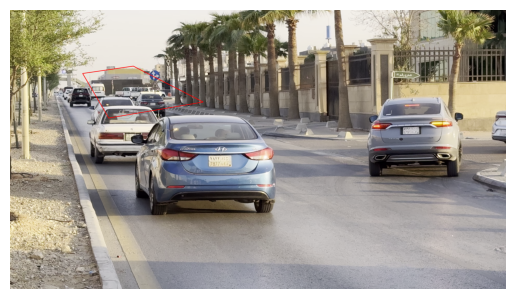


0: 384x640 (no detections), 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
No violation detected in frame 2.


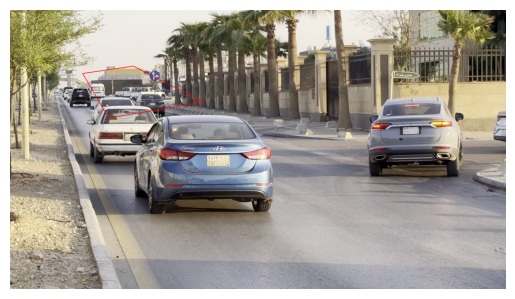


0: 384x640 (no detections), 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
No violation detected in frame 3.


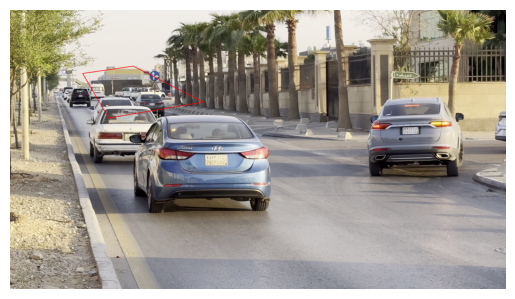


0: 384x640 1 Person, 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Violation detected: in_red_lane. Image saved at /kaggle/working/violations/violation_frame_4.jpg.
No license plate detected, email not sent.


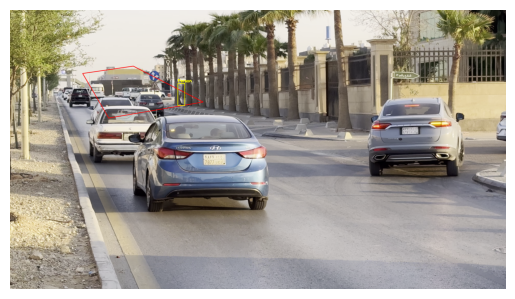


0: 384x640 1 License_plate, 1 Person, 11.7ms
Speed: 3.5ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Violation detected: in_red_lane. Image saved at /kaggle/working/violations/violation_frame_5.jpg.
No license plate detected, email not sent.


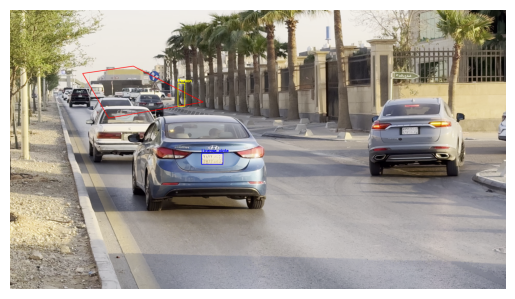


0: 384x640 (no detections), 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
No violation detected in frame 6.


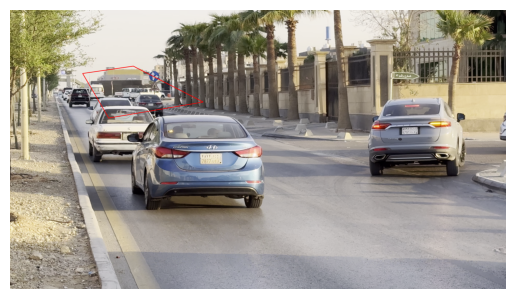


0: 384x640 (no detections), 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
No violation detected in frame 7.


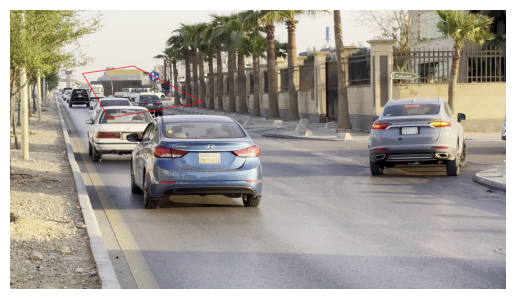


0: 384x640 (no detections), 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
No violation detected in frame 8.


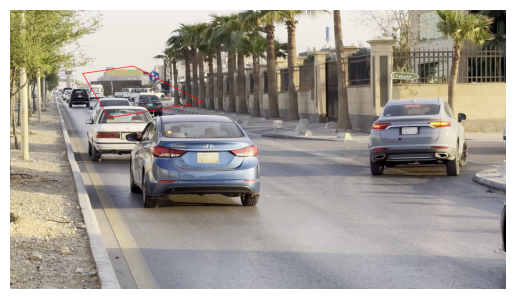


0: 384x640 1 License_plate, 1 MotorbikeDelivery, 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
No violation detected in frame 9.


KeyboardInterrupt: 

In [71]:
import cv2
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image, ImageDraw, ImageFont
import sqlite3
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
import re
import torch
from datetime import datetime
import matplotlib.pyplot as plt
import zipfile

# Email credentials
FROM_EMAIL = "nalsaqer56@gmail.com"
EMAIL_PASSWORD = "nmapwnecdxuhzzry"  # Use App-Specific Password here
TO_EMAIL = "nalsaqer56@gmail.com"
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465

# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}

class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}

# Connect to SQLite Database
conn = sqlite3.connect('motorbike_detections.db')
cursor = conn.cursor()

# Create the MotorbikeDetections table with required fields
cursor.execute('''
CREATE TABLE IF NOT EXISTS MotorbikeDetections (
    DetectionID INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATE NOT NULL,
    Time TIME NOT NULL,
    City VARCHAR(100),
    LicenseNumber VARCHAR(50),
    LicenseLetters VARCHAR(50),
    LaneViolation BOOLEAN NOT NULL,
    NoHelmet BOOLEAN NOT NULL,
    ImageLink VARCHAR(255)
)
''')

# Function to save detection data to the database
def save_detection_to_db(city, license_number, license_letters, lane_violation, no_helmet, image_link):
    date = datetime.now().strftime('%Y-%m-%d')
    time = datetime.now().strftime('%H:%M:%S')
    data = {
        'date': date,
        'time': time,
        'city': city,
        'license_number': license_number,
        'license_letters': license_letters,
        'lane_violation': int(lane_violation),  # Store as 1 or 0
        'no_helmet': int(no_helmet),            # Store as 1 or 0
        'image_link': image_link
    }
    
    cursor.execute('''
        INSERT INTO MotorbikeDetections (Date, Time, City, LicenseNumber, LicenseLetters, LaneViolation, NoHelmet, ImageLink)
        VALUES (:date, :time, :city, :license_number, :license_letters, :lane_violation, :no_helmet, :image_link)
    ''', data)
    conn.commit()
    print(f"Detection saved to database: {license_number}, {license_letters}")

# Load the OCR model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
model_ocr = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed").to('cuda')

# Function to filter license plate text
def filter_license_plate_text(license_plate_text):
    license_plate_text = re.sub(r'[^A-Z0-9]+', "", license_plate_text.upper())
    match = re.search(r'(\d{4})([A-Z]{2})', license_plate_text)
    return f"{match.group(1)} {match.group(2)}" if match else None

# Function to convert text to Arabic
def convert_to_arabic(license_plate_text):
    return "".join(arabic_dict.get(char, char) for char in license_plate_text)

# Function to sharpen the image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Function to apply adaptive thresholding
def apply_threshold(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Function to send email notification with image attachment
def send_email(license_text, violation_image_path, violation_type):
    if violation_type == 'no_helmet':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة'
        body = f"لعدم ارتداء الخوذة ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'in_red_lane':
        subject = 'تنبيه مخالفة: دخول المسار الأيسر'
        body = f"لدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'no_helmet_in_red_lane':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة ودخول المسار الأيسر'
        body = f"لعدم ارتداء الخوذة ولدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"

    msg = MIMEMultipart()
    msg['From'] = FROM_EMAIL
    msg['To'] = TO_EMAIL
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    if os.path.exists(violation_image_path):
        with open(violation_image_path, 'rb') as attachment_file:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment_file.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(violation_image_path)}')
            msg.attach(part)

    with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
        server.login(FROM_EMAIL, EMAIL_PASSWORD)
        server.sendmail(FROM_EMAIL, TO_EMAIL, msg.as_string())
        print("Email with attachment sent successfully!")

def draw_text_pil(img, text, position, font_path, font_size, color):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)

    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()

    draw.text(position, text, font=font, fill=color)
    img_np = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return img_np

# Load YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')

# Load video instead of an image
video_path = '/kaggle/input/nasser-videos-down/IMG_9016.MOV'
cap = cv2.VideoCapture(video_path)

# Ensure video is opened correctly
if not cap.isOpened():
    raise ValueError(f"Failed to open video from: {video_path}")

# Directory to save violation frames
violation_dir = "/kaggle/working/violations"
os.makedirs(violation_dir, exist_ok=True)

# Video processing loop
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # End of video

    frame_count += 1

    # Define the red lane polygon
    red_lane = np.array([[764, 836], [1495, 712], [954, 434], [562, 491]], np.int32)

    # Draw lane polygons
    cv2.polylines(frame, [red_lane], isClosed=True, color=(0, 0, 255), thickness=3)

    # Perform detection using YOLO on the current frame
    results = model.track(frame)

    # Initialize variables for each frame
    helmet_detected = False
    no_helmet_detected = False
    in_red_lane = False
    license_text = False
    filtered_text = False
    violation_image_path = os.path.join(violation_dir, f'violation_frame_{frame_count}.jpg')
    city = 'Riyadh'  # Assuming city is Riyadh for now

    # Process detection results
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
        label = model.names[int(box.cls)]
        color = class_colors[int(box.cls)]

        # Draw bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

        if label == 'Helmet':
            helmet_detected = True
        elif label == 'No_Helmet':
            no_helmet_detected = True

        motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
        if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
            in_red_lane = True

        if label == 'License_plate':
            license_plate_img = frame[y1:y2, x1:x2]

            # Apply sharpening to the license plate
            license_plate_sharpened = sharpen_image(license_plate_img)

            # Apply thresholding
            license_plate_thresh = apply_threshold(license_plate_sharpened)

            # Convert the thresholded image (2D) back to RGB (3D)
            license_plate_rgb = cv2.cvtColor(license_plate_thresh, cv2.COLOR_GRAY2RGB)

            # Resize for better OCR
            license_plate_resized = cv2.resize(license_plate_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

            # Convert the thresholded, resized license plate to PIL format
            license_plate_pil = Image.fromarray(license_plate_resized)

            # Save the image for inspection if needed
            temp_image_path = os.path.join(violation_dir, f'license_plate_frame_{frame_count}.png')
            license_plate_pil.save(temp_image_path)

            # Perform OCR on the license plate
            pixel_values = processor(images=license_plate_pil, return_tensors="pt").pixel_values.to('cuda')
            generated_ids = model_ocr.generate(pixel_values, max_new_tokens=50)
            license_plate_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)[0]

            # Process and filter the license plate text
            filtered_text = filter_license_plate_text(license_plate_text)

            if filtered_text:
                arabic_text = convert_to_arabic(filtered_text)
                license_number, license_letters = filtered_text.split()
                frame = draw_text_pil(frame, filtered_text, (x1, y2 + 30), "/kaggle/input/fontss/alfont_com_arial-1.ttf", font_size=30, color=(255, 255, 255))
                frame = draw_text_pil(frame, arabic_text, (x1, y2), "/kaggle/input/fontss/alfont_com_arial-1.ttf", font_size=30, color=(0, 255, 0))

    # Determine violation type for the frame
    violation_type = None
    if no_helmet_detected and in_red_lane:
        violation_type = 'no_helmet_in_red_lane'
    elif no_helmet_detected:
        violation_type = 'no_helmet'
    elif in_red_lane:
        violation_type = 'in_red_lane'

    if violation_type:
        cv2.imwrite(violation_image_path, frame)
        print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")

        if filtered_text:
            save_detection_to_db(city, license_number, license_letters, in_red_lane, no_helmet_detected, violation_image_path)
            send_email(filtered_text + " / " + arabic_text, violation_image_path, violation_type)
        else:
            print("No license plate detected, email not sent.")
    else:
        print(f"No violation detected in frame {frame_count}.")

    # Display the frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Zip the folder of violations for easy download
zip_path = "/kaggle/working/violations.zip"
with zipfile.ZipFile(zip_path, 'w') as violation_zip:
    for root, dirs, files in os.walk(violation_dir):
        for file in files:
            violation_zip.write(os.path.join(root, file), arcname=file)

# Release video capture
cap.release()
print(f"All violation frames saved and zipped at: {zip_path}")


## Faris codes

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image or a frame from the video to manually adjust the lane boxes
image_path = "/kaggle/input/test-final-down-png/test final down.png"  # You can use a frame extracted from your video
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Define the red and green lane boxes
red_lane = np.array([[0, 2050], [2200, 2000], [2100, 800], [200, 800]], np.int32)  # Example points for left 2 lanes

# Draw the lane polygons for visualization on the frame
cv2.polylines(img, [red_lane], isClosed=True, color=(0, 0, 255), thickness=3)    # Red polygon for left 2 lanes

# Convert the image from BGR to RGB for correct color display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Lane Boxes Visualization')
plt.show()



In [3]:
import cv2
import numpy as np
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
from transformers import AutoModel, AutoProcessor
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt
import torch

# Email credentials (replace with your App-Specific Password)
FROM_EMAIL = "gggg@gmail.com"
EMAIL_PASSWORD = "from yout account in email website"  # Use App-Specific Password here
TO_EMAIL = "gggg@gmail.com"
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465


# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}
class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}
# Load the OCR model
processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True)
model_ocr = AutoModel.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True).to('cuda')

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/986 [00:00<?, ?B/s]

modeling_GOT.py:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

render_tools.py:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- render_tools.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


got_vision_b.py:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- got_vision_b.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- modeling_GOT.py
- render_tools.py
- got_vision_b.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenization_qwen.py:   0%|          | 0.00/9.47k [00:00<?, ?B/s]

ValueError: Unrecognized processing class in stepfun-ai/GOT-OCR2_0. Can't instantiate a processor, a tokenizer, an image processor or a feature extractor for this model. Make sure the repository contains the files of at least one of those processing classes.

In [ ]:
# Function to filter license plate text
def filter_license_plate_text(license_plate_text):
    license_plate_text=re.sub(r'[^A-Z0-9]+',"",license_plate_text)
    match = re.search(r'(\d{4})\s*([A-Z]{2})', license_plate_text)
    return f"{match.group(1)} {match.group(2)}" if match else None

# Function to convert text to Arabic
def convert_to_arabic(license_plate_text):
    return "".join(arabic_dict.get(char, char) for char in license_plate_text)

# Function to send email notification with image attachment
def send_email(license_text, violation_image_path, violation_type):
    if violation_type == 'no_helmet':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة'
        body = f"لعدم ارتداء الخوذة ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'in_red_lane':
        subject = 'تنبيه مخالفة: دخول المسار الأيسر'
        body = f"لدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'no_helmet_in_red_lane':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة ودخول المسار الأيسر'
        body = f"لعدم ارتداء الخوذة ولدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"

    msg = MIMEMultipart()
    msg['From'] = FROM_EMAIL
    msg['To'] = TO_EMAIL
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    if os.path.exists(violation_image_path):
        with open(violation_image_path, 'rb') as attachment_file:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment_file.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(violation_image_path)}')
            msg.attach(part)

    with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
        server.login(FROM_EMAIL, EMAIL_PASSWORD)
        server.sendmail(FROM_EMAIL, TO_EMAIL, msg.as_string())
        print("Email with attachment sent successfully!")
        
def draw_text_pil(img, text, position, font_path, font_size, color):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    draw = ImageDraw.Draw(img_pil)
    
    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()
        
    draw.text(position, text, font=font, fill=color)
    
    img_np = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return img_np

In [ ]:
# Load YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')

# Load image
image = cv2.imread('/kaggle/input/test-final-down-png/test final down.png')

font_path="/kaggle/input/fontss/alfont_com_arial-1.ttf"
# Perform detection using YOLO
results = model.track(image) 

# Initialize variables for helmet and lane check
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_text = False
filtered_text = False
violation_image_path = '/kaggle/working/violation.jpg'

# Process the detection results and draw bounding boxes
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]
    color = class_colors[int(box.cls)]  # Get color based on class ID

    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color , 3)

    if label == 'Helmet':
        helmet_detected = True
    elif label == 'No_Helmet':
        no_helmet_detected = True

    motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
    if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
        in_red_lane = True

    if label == 'License_plate':
        license_plate_img = image[y1:y2, x1:x2]
        license_plate_pil = Image.fromarray(cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2RGB))
        temp_image_path = '/kaggle/working/license_plate.png'
        license_plate_pil.save(temp_image_path)
        

        license_plate_text = model_ocr.chat(processor, temp_image_path, ocr_type='ocr')
        filtered_text = filter_license_plate_text(license_plate_text)
        if filtered_text:
            arabic_text = convert_to_arabic(filtered_text)
            # Draw the English version using PIL
            image = draw_text_pil(image, filtered_text, (x1, y2 + 30), font_path, font_size=30, color=(255, 255, 255))
            # Draw the Arabic version using PIL 
            image = draw_text_pil(image, arabic_text, (x1, y2), font_path, font_size=30, color=(0, 255, 0))
            
# Determine violation type
violation_type = None
if no_helmet_detected and in_red_lane:
    violation_type = 'no_helmet_in_red_lane'
elif no_helmet_detected:
    violation_type = 'no_helmet'
elif in_red_lane:
    violation_type = 'in_red_lane'

if violation_type:
    cv2.imwrite(violation_image_path, image)
    print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")

    if filtered_text:
        send_email(filtered_text+ " / "+ arabic_text, violation_image_path, violation_type)
    else:
        print("No license plate detected, email not sent.")
else:
    print("No violation detected.")

if helmet_detected:
    print("Helmet is being worn.")
if no_helmet_detected:
    print("No helmet is being worn.")
if in_red_lane:
    print("Motorbike is in the red lane (violation).")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## from khaled

In [10]:
# Install necessary libraries
!pip install ultralytics
!pip install pillow
!pip install transformers
!pip install smtplib
!pip install torch
!pip install opencv-python
!pip install -U ipywidgets
!pip install torch torchvision 
!pip install verovio
!pip install pytesseract
!pip install tiktoken

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


ERROR: Could not find a version that satisfies the requirement smtplib (from versions: none)
ERROR: No matching distribution found for smtplib
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00a 0:00:01


In [11]:
import cv2
import numpy as np
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
from transformers import AutoModel, AutoProcessor
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt
import torch
import sqlite3
from datetime import datetime

In [12]:
arabic_dict = {
  "0" :"٠" ,
  "1":"١",
  "2":"٢",
  "3":"٣",
  "4":"٤",
  "5":"٥",
  "6":"٦",
  "7":"٧",
  "8":"٨",
  "9":"٩",
  "A":"ا",
  "B":"ب",
  "J":"ح",
  "D":"د",
  "R":"ر",
  "S":"س",
  "X":"ص",
  "T":"ط",
  "E":"ع",
  "G":"ق",
  "K":"ك",
  "L":"ل",
  "Z":"م",
  "N":"ن",
  "H":"ه",
  "U":"و",
  "V":"ي",
  " ":" "
}

In [14]:
from transformers import AutoModel, AutoTokenizer, AutoProcessor
from PIL import Image
import torch


processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True)
model_ocr = AutoModel.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True).to('cuda') # Move the model to the GPU


image_file = '/kaggle/input/test-final-down-png/test final down.png'

In [15]:
res = model_ocr.chat(processor, image_file, ocr_type='ocr') # No need to specify device_map as the model is already on the GPU
res

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.


'HUNGER STATION 9439 AB'


0: 640x416 1 License_plate, 1 MotorbikeDelivery, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)
Detected License Plate: ae


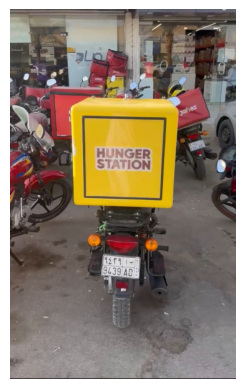

In [19]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import sqlite3
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
import re
import matplotlib.pyplot as plt
import torch
from datetime import datetime

# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}

# Connect to SQLite Database
conn = sqlite3.connect('motorbike_detections.db')
cursor = conn.cursor()

# Create the MotorbikeDetections table with required fields
cursor.execute('''
CREATE TABLE IF NOT EXISTS MotorbikeDetections (
    DetectionID INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATE NOT NULL,
    Time TIME NOT NULL,
    City VARCHAR(100),
    LicenseNumber VARCHAR(50),
    LicenseLetters VARCHAR(50),
    LaneViolation BOOLEAN NOT NULL,
    NoHelmet BOOLEAN NOT NULL,
    ImageLink VARCHAR(255)
)
''')

# Function to save detection data to the database
def save_detection_to_db(city, license_number, license_letters, lane_violation, no_helmet, image_link):
    date = datetime.now().strftime('%Y-%m-%d')
    time = datetime.now().strftime('%H:%M:%S')
    data = {
        'date': date,
        'time': time,
        'city': city,
        'license_number': license_number,
        'license_letters': license_letters,
        'lane_violation': int(lane_violation),  # Store as 1 or 0
        'no_helmet': int(no_helmet),            # Store as 1 or 0
        'image_link': image_link
    }
    
    cursor.execute('''
        INSERT INTO MotorbikeDetections (Date, Time, City, LicenseNumber, LicenseLetters, LaneViolation, NoHelmet, ImageLink)
        VALUES (:date, :time, :city, :license_number, :license_letters, :lane_violation, :no_helmet, :image_link)
    ''', data)
    conn.commit()
    print(f"Detection saved to database: {license_number}, {license_letters}")

# Function to crop the license plate from the image
def crop_license_plate(image, x1, y1, x2, y2):
    return image[y1:y2, x1:x2]

# Function to run OCR using Pytesseract on the cropped license plate image
def perform_ocr(license_plate_img):
    # Convert the image to grayscale for better OCR results
    gray = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)

    # Use Pytesseract to do OCR on the license plate image
    ocr_text = pytesseract.image_to_string(gray, config='--psm 8')  # psm 8 is good for single word detection

    return ocr_text.strip()

# Load YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')  # Replace with the path to your YOLO model if necessary

# Load and preprocess the image
image_path = '/kaggle/input/test-final-down-png/test final down.png'
image = cv2.imread(image_path)

# Ensure the image is loaded
if image is None:
    raise ValueError(f"Failed to load image from: {image_path}")

# Run YOLO to detect objects
results = model(image)

# Initialize variables
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_plate_detected = False

# Iterate over detected objects
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]

    if label == 'License_plate':
        # Crop the license plate region from the image
        license_plate_img = crop_license_plate(image, x1, y1, x2, y2)

        # Run OCR on the cropped license plate image
        license_plate_text = perform_ocr(license_plate_img)

        # Display the OCR result
        print(f"Detected License Plate: {license_plate_text}")
        license_plate_detected = True

        # You can further process or store the license plate information here

# If no license plate was detected
if not license_plate_detected:
    print("No license plate detected.")

# Display the processed image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



0: 640x416 1 License_plate, 1 MotorbikeDelivery, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)
Violation detected: in_red_lane. Image saved at /kaggle/working/violation.jpg.
No license plate detected, but violation occurred.


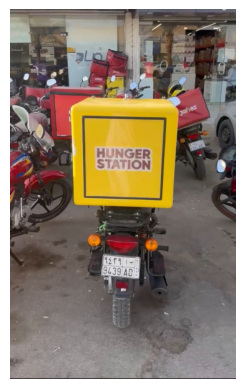

In [20]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import sqlite3
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
import re
import matplotlib.pyplot as plt
from datetime import datetime

# Connect to SQLite Database
conn = sqlite3.connect('motorbike_detections.db')
cursor = conn.cursor()

# Create the MotorbikeDetections table with required fields
cursor.execute('''
CREATE TABLE IF NOT EXISTS MotorbikeDetections (
    DetectionID INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATE NOT NULL,
    Time TIME NOT NULL,
    City VARCHAR(100),
    LicenseNumber VARCHAR(50),
    LicenseLetters VARCHAR(50),
    LaneViolation BOOLEAN NOT NULL,
    NoHelmet BOOLEAN NOT NULL,
    ImageLink VARCHAR(255)
)
''')

# Function to save detection data to the database
def save_detection_to_db(city, license_number, license_letters, lane_violation, no_helmet, image_link):
    date = datetime.now().strftime('%Y-%m-%d')
    time = datetime.now().strftime('%H:%M:%S')
    data = {
        'date': date,
        'time': time,
        'city': city,
        'license_number': license_number,
        'license_letters': license_letters,
        'lane_violation': int(lane_violation),  # Store as 1 or 0
        'no_helmet': int(no_helmet),            # Store as 1 or 0
        'image_link': image_link
    }
    
    cursor.execute('''
        INSERT INTO MotorbikeDetections (Date, Time, City, LicenseNumber, LicenseLetters, LaneViolation, NoHelmet, ImageLink)
        VALUES (:date, :time, :city, :license_number, :license_letters, :lane_violation, :no_helmet, :image_link)
    ''', data)
    conn.commit()
    print(f"Detection saved to database: {license_number}, {license_letters}")

# Function to crop the license plate from the image
def crop_license_plate(image, x1, y1, x2, y2):
    return image[y1:y2, x1:x2]

# Function to run OCR using Pytesseract on the cropped license plate image
def perform_ocr(license_plate_img):
    # Convert the image to grayscale for better OCR results
    gray = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR
    ocr_text = pytesseract.image_to_string(gray, config='--psm 8')  # psm 8 is good for single word detection
    return ocr_text.strip()

# Load your trained YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')  # Replace with your model's path

# Load and preprocess the image
image_path = '/kaggle/input/test-final-down-png/test final down.png'
image = cv2.imread(image_path)

# Ensure the image is loaded
if image is None:
    raise ValueError(f"Failed to load image from: {image_path}")

# Define red lane polygon
red_lane = np.array([[330,550], [49,554], [9,111], [292,113]], np.int32)

# Run YOLO model to detect motorbikes, helmets, and license plates
results = model(image)

# Initialize variables for helmet detection, lane violation, and license plate detection
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_plate_detected = False
license_number = ""
license_letters = ""

# Process the detections
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]

    if label == 'License_plate':
        # Crop the license plate region from the image
        license_plate_img = crop_license_plate(image, x1, y1, x2, y2)

        # Run OCR on the cropped license plate image
        license_plate_text = perform_ocr(license_plate_img)

        # Extract and filter license plate text
        filtered_text = re.sub(r'[^A-Z0-9]', '', license_plate_text.upper())
        if len(filtered_text) >= 6:
            license_number = filtered_text[:4]
            license_letters = filtered_text[4:6]
            print(f"Detected License Plate: {license_number} {license_letters}")
            license_plate_detected = True
        
        # Save the license plate image for review
        cv2.imwrite(f'/kaggle/working/license_plate_{license_number}.png', license_plate_img)

    if label == 'Helmet':
        helmet_detected = True
    elif label == 'No_Helmet':
        no_helmet_detected = True

    # Check if the motorbike is in the red lane
    motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
    if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
        in_red_lane = True

# Determine violation type
violation_type = None
if no_helmet_detected and in_red_lane:
    violation_type = 'no_helmet_in_red_lane'
elif no_helmet_detected:
    violation_type = 'no_helmet'
elif in_red_lane:
    violation_type = 'in_red_lane'

# Save and send notifications if a violation is detected
if violation_type:
    violation_image_path = '/kaggle/working/violation.jpg'
    cv2.imwrite(violation_image_path, image)
    print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")

    if license_plate_detected:
        save_detection_to_db("Riyadh", license_number, license_letters, in_red_lane, no_helmet_detected, violation_image_path)
    else:
        print("No license plate detected, but violation occurred.")
else:
    print("No violation detected.")

# Display the processed image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


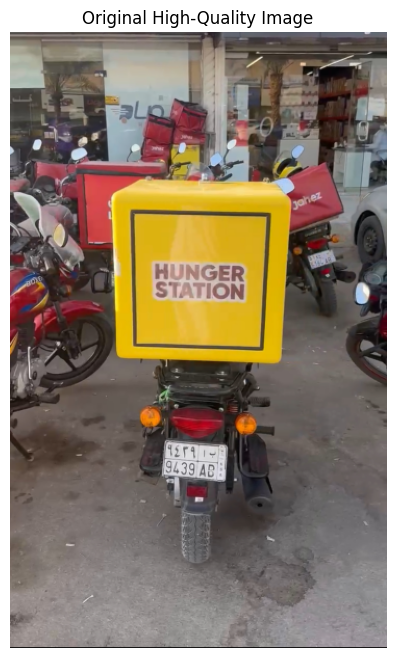


0: 640x416 1 License_plate, 1 MotorbikeDelivery, 12.2ms
Speed: 39.6ms preprocess, 12.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 416)


ValueError: You need to specify either `text` or `text_target`.

In [23]:
import cv2
import numpy as np
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
from transformers import AutoModel, AutoProcessor
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt
import torch
import sqlite3
from datetime import datetime

# Email credentials
FROM_EMAIL = "gggg@gmail.com"
EMAIL_PASSWORD = "from yout account in email website"  # Use App-Specific Password here
TO_EMAIL = "nalsaqer56@gmail.com"
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465

# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}

class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}

# Connect to SQLite Database
conn = sqlite3.connect('motorbike_detections.db')
cursor = conn.cursor()

# Create the MotorbikeDetections table with required fields
cursor.execute('''
CREATE TABLE IF NOT EXISTS MotorbikeDetections (
    DetectionID INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATE NOT NULL,
    Time TIME NOT NULL,
    City VARCHAR(100),
    LicenseNumber VARCHAR(50),
    LicenseLetters VARCHAR(50),
    LaneViolation BOOLEAN NOT NULL,
    NoHelmet BOOLEAN NOT NULL,
    ImageLink VARCHAR(255)
)
''')

# Function to save detection data to the database
def save_detection_to_db(city, license_number, license_letters, lane_violation, no_helmet, image_link):
    date = datetime.now().strftime('%Y-%m-%d')
    time = datetime.now().strftime('%H:%M:%S')
    data = {
        'date': date,
        'time': time,
        'city': city,
        'license_number': license_number,
        'license_letters': license_letters,
        'lane_violation': int(lane_violation),  # Store as 1 or 0
        'no_helmet': int(no_helmet),            # Store as 1 or 0
        'image_link': image_link
    }
    
    cursor.execute('''
        INSERT INTO MotorbikeDetections (Date, Time, City, LicenseNumber, LicenseLetters, LaneViolation, NoHelmet, ImageLink)
        VALUES (:date, :time, :city, :license_number, :license_letters, :lane_violation, :no_helmet, :image_link)
    ''', data)
    conn.commit()
    print(f"Detection saved to database: {license_number}, {license_letters}")

# Function to send email notification with image attachment
def send_email(license_text, violation_image_path, violation_type):
    if violation_type == 'no_helmet':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة'
        body = f"لعدم ارتداء الخوذة ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'in_red_lane':
        subject = 'تنبيه مخالفة: دخول المسار الأيسر'
        body = f"لدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'no_helmet_in_red_lane':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة ودخول المسار الأيسر'
        body = f"لعدم ارتداء الخوذة ولدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"

    msg = MIMEMultipart()
    msg['From'] = FROM_EMAIL
    msg['To'] = TO_EMAIL
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    if os.path.exists(violation_image_path):
        with open(violation_image_path, 'rb') as attachment_file:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment_file.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(violation_image_path)}')
            msg.attach(part)

    with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
        server.login(FROM_EMAIL, EMAIL_PASSWORD)
        server.sendmail(FROM_EMAIL, TO_EMAIL, msg.as_string())
        print("Email with attachment sent successfully!")

# Load YOLO model for motorbike detection
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')

# Load the OCR model provided by your friend
processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True)
model_ocr = AutoModel.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True).to('cuda')

# Function to perform OCR on license plate
def perform_ocr(license_plate_img):
    pil_image = Image.fromarray(license_plate_img)

    # Preprocess the image using the processor
    inputs = processor(images=pil_image, return_tensors="pt")

    # Ensure we're using the correct device
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # Run the OCR model
    generated_ids = model_ocr.generate(inputs['pixel_values'], max_new_tokens=50)

    # Decode the OCR output
    ocr_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)[0]

    return ocr_text

# Function to convert text to Arabic
def convert_to_arabic(license_plate_text):
    return "".join(arabic_dict.get(char, char) for char in license_plate_text)

# Load image with high quality and handle errors
image_path = '/kaggle/input/test-final-down-png/test final down.png'
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found at path: {image_path}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load image from: {image_path}")

# Convert to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original high-quality image
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original High-Quality Image')
plt.show()

# Define the red lane polygon
red_lane = np.array([[330,550], [49,554], [9,111], [292,113]], np.int32)
cv2.polylines(image, [red_lane], isClosed=True, color=(0, 0, 255), thickness=3)

# Perform detection using YOLO
results = model.track(image)

# Initialize detection variables
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_text = False
filtered_text = False
violation_image_path = '/kaggle/working/violation.jpg'
city = 'Riyadh'

# Process YOLO detection results
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]
    color = class_colors[int(box.cls)]

    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    if label == 'Helmet':
        helmet_detected = True
    elif label == 'No_Helmet':
        no_helmet_detected = True

    motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
    if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
        in_red_lane = True

    if label == 'License_plate':
        license_plate_img = image[y1:y2, x1:x2]
        
        # Perform OCR on the cropped license plate image
        license_plate_text = perform_ocr(license_plate_img)
        print(f"Detected License Plate: {license_plate_text}")
        
        # Convert OCR result to Arabic and display on the image
        filtered_text = re.sub(r'[^A-Z0-9]+', "", license_plate_text.upper())
        if filtered_text:
            arabic_text = convert_to_arabic(filtered_text)
            license_number, license_letters = filtered_text[:4], filtered_text[4:]
            cv2.putText(image, filtered_text, (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(image, arabic_text, (x1, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Determine violation type
violation_type = None
if no_helmet_detected and in_red_lane:
    violation_type = 'no_helmet_in_red_lane'
elif no_helmet_detected:
    violation_type = 'no_helmet'
elif in_red_lane:
    violation_type = 'in_red_lane'

# Save and email violation image if violation detected
if violation_type:
    cv2.imwrite(violation_image_path, image)
    print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")
    
    if filtered_text:
        save_detection_to_db(city, license_number, license_letters, in_red_lane, no_helmet_detected, violation_image_path)
        send_email(filtered_text + " / " + arabic_text, violation_image_path, violation_type)
    else:
        print("No license plate detected, email not sent.")
else:
    print("No violation detected.")

# Display final image with detections
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


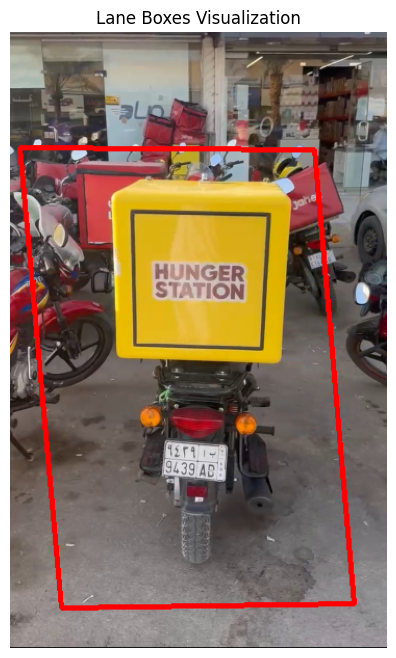

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image or a frame from the video to manually adjust the lane boxes
image_path = "/kaggle/input/test-final-down-png/test final down.png"  # You can use a frame extracted from your video
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Define the red and green lane boxes
red_lane = np.array([[330,550], [49,554], [9,111], [292,113]], np.int32)  # Example points for left 2 lanes

# Draw the lane polygons for visualization on the frame
cv2.polylines(img, [red_lane], isClosed=True, color=(0, 0, 255), thickness=3)    # Red polygon for left 2 lanes

# Convert the image from BGR to RGB for correct color display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Lane Boxes Visualization')
plt.show()



In [31]:
import cv2
import numpy as np
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
from ultralytics import YOLO
from transformers import AutoModel, AutoProcessor
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt
import torch

# Email credentials (replace with your App-Specific Password)
FROM_EMAIL = "nalsaqer56@gmail.com"
EMAIL_PASSWORD = "nmapwnecdxuhzzry"  # Use App-Specific Password here
TO_EMAIL = "nalsaqer56@gmail.com"
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465

# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}
class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}
# Load the OCR model
processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True)
model_ocr = AutoModel.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True).to('cuda')

In [33]:
# Function to filter license plate text
def filter_license_plate_text(license_plate_text):
    license_plate_text=re.sub(r'[^A-Z0-9]+',"",license_plate_text)
    match = re.search(r'(\d{4})\s*([A-Z]{2})', license_plate_text)
    return f"{match.group(1)} {match.group(2)}" if match else None

# Function to convert text to Arabic
def convert_to_arabic(license_plate_text):
    return "".join(arabic_dict.get(char, char) for char in license_plate_text)

# Function to send email notification with image attachment
def send_email(license_text, violation_image_path, violation_type):
    if violation_type == 'no_helmet':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة'
        body = f"لعدم ارتداء الخوذة ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'in_red_lane':
        subject = 'تنبيه مخالفة: دخول المسار الأيسر'
        body = f"لدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'no_helmet_in_red_lane':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة ودخول المسار الأيسر'
        body = f"لعدم ارتداء الخوذة ولدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"

    msg = MIMEMultipart()
    msg['From'] = FROM_EMAIL
    msg['To'] = TO_EMAIL
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    if os.path.exists(violation_image_path):
        with open(violation_image_path, 'rb') as attachment_file:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment_file.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(violation_image_path)}')
            msg.attach(part)

    with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
        server.login(FROM_EMAIL, EMAIL_PASSWORD)
        server.sendmail(FROM_EMAIL, TO_EMAIL, msg.as_string())
        print("Email with attachment sent successfully!")
        
def draw_text_pil(img, text, position, font_path, font_size, color):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    draw = ImageDraw.Draw(img_pil)
    
    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()
        
    draw.text(position, text, font=font, fill=color)
    
    img_np = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return img_np


0: 416x640 1 License_plate, 47.2ms
Speed: 1.7ms preprocess, 47.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


Font file not found at /kaggle/input/fontss/alfont_com_arial-1.ttf. Using default font.
Font file not found at /kaggle/input/fontss/alfont_com_arial-1.ttf. Using default font.
No violation detected.


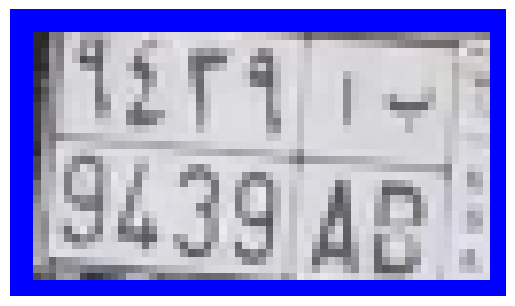

In [38]:
# Load YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')

# Load image
image = cv2.imread('/kaggle/input/license-plate-1-png-6-62-kb/license_plate_ (1).png')

font_path="/kaggle/input/fontss/alfont_com_arial-1.ttf"
# Perform detection using YOLO
results = model.track(image) 

# Initialize variables for helmet and lane check
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_text = False
filtered_text = False
violation_image_path = '/kaggle/working/violation.jpg'

# Process the detection results and draw bounding boxes
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]
    color = class_colors[int(box.cls)]  # Get color based on class ID

    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color , 3)

    if label == 'Helmet':
        helmet_detected = True
    elif label == 'No_Helmet':
        no_helmet_detected = True

    motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
    if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
        in_red_lane = True

    if label == 'License_plate':
        license_plate_img = image[y1:y2, x1:x2]
        license_plate_pil = Image.fromarray(cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2RGB))
        temp_image_path = '/kaggle/working/license_plate.png'
        license_plate_pil.save(temp_image_path)
        

        license_plate_text = model_ocr.chat(processor, temp_image_path, ocr_type='ocr')
        filtered_text = filter_license_plate_text(license_plate_text)
        if filtered_text:
            arabic_text = convert_to_arabic(filtered_text)
            # Draw the English version using PIL
            image = draw_text_pil(image, filtered_text, (x1, y2 + 30), font_path, font_size=30, color=(255, 255, 255))
            # Draw the Arabic version using PIL 
            image = draw_text_pil(image, arabic_text, (x1, y2), font_path, font_size=30, color=(0, 255, 0))
            
# Determine violation type
violation_type = None
if no_helmet_detected and in_red_lane:
    violation_type = 'no_helmet_in_red_lane'
elif no_helmet_detected:
    violation_type = 'no_helmet'
elif in_red_lane:
    violation_type = 'in_red_lane'

if violation_type:
    cv2.imwrite(violation_image_path, image)
    print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")

    if filtered_text:
        send_email(filtered_text+ " / "+ arabic_text, violation_image_path, violation_type)
    else:
        print("No license plate detected, email not sent.")
else:
    print("No violation detected.")

if helmet_detected:
    print("Helmet is being worn.")
if no_helmet_detected:
    print("No helmet is being worn.")
if in_red_lane:
    print("Motorbike is in the red lane (violation).")

# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

In [6]:
import cv2
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image, ImageDraw, ImageFont
import sqlite3
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
import os
import re
import torch
from datetime import datetime
import matplotlib.pyplot as plt

# Email credentials
FROM_EMAIL = "gggg@gmail.com"
EMAIL_PASSWORD = "from yout account in email website"  # Use App-Specific Password here
TO_EMAIL = "gggg@gmail.com"
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465

# Arabic dictionary for converting license plate text
arabic_dict = {
    "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥",
    "6": "٦", "7": "٧", "8": "٨", "9": "٩", "A": "ا", "B": "ب",
    "J": "ح", "D": "د", "R": "ر", "S": "س", "X": "ص", "T": "ط",
    "E": "ع", "G": "ق", "K": "ك", "L": "ل", "Z": "م", "N": "ن",
    "H": "ه", "U": "و", "V": "ي", " ": " "
}

class_colors = {
    0: (0, 255, 0),    # Green (Helmet)
    1: (255, 0, 0),    # Blue (License Plate)
    2: (0, 0, 255),    # Red (MotorbikeDelivery)
    3: (255, 255, 0),  # Cyan (MotorbikeSport)
    4: (255, 0, 255),  # Magenta (No Helmet)
    5: (0, 255, 255),  # Yellow (Person)
}

# Connect to SQLite Database
conn = sqlite3.connect('motorbike_detections.db')
cursor = conn.cursor()

# Create the MotorbikeDetections table with required fields
cursor.execute('''
CREATE TABLE IF NOT EXISTS MotorbikeDetections (
    DetectionID INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATE NOT NULL,
    Time TIME NOT NULL,
    City VARCHAR(100),
    LicenseNumber VARCHAR(50),
    LicenseLetters VARCHAR(50),
    LaneViolation BOOLEAN NOT NULL,
    NoHelmet BOOLEAN NOT NULL,
    ImageLink VARCHAR(255)
)
''')

# Function to save detection data to the database
def save_detection_to_db(city, license_number, license_letters, lane_violation, no_helmet, image_link):
    date = datetime.now().strftime('%Y-%m-%d')
    time = datetime.now().strftime('%H:%M:%S')
    data = {
        'date': date,
        'time': time,
        'city': city,
        'license_number': license_number,
        'license_letters': license_letters,
        'lane_violation': lane_violation,  # Store as 1 or 0
        'no_helmet': no_helmet,            # Store as 1 or 0
        'image_link': image_link
    }
    
    cursor.execute('''
        INSERT INTO MotorbikeDetections (Date, Time, City, LicenseNumber, LicenseLetters, LaneViolation, NoHelmet, ImageLink)
        VALUES (:date, :time, :city, :license_number, :license_letters, :lane_violation, :no_helmet, :image_link)
    ''', data)
    conn.commit()
    print(f"Detection saved to database: {license_number}, {license_letters}")

# Load the OCR model
#processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
#model_ocr = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed").to('cuda')

processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True)
model_ocr = AutoModel.from_pretrained("stepfun-ai/GOT-OCR2_0", trust_remote_code=True).to('cuda')

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/986 [00:00<?, ?B/s]

modeling_GOT.py:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

got_vision_b.py:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- got_vision_b.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


render_tools.py:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- render_tools.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- modeling_GOT.py
- got_vision_b.py
- render_tools.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenization_qwen.py:   0%|          | 0.00/9.47k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stepfun-ai/GOT-OCR2_0:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen.tiktoken:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/149 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

In [7]:
# Function to filter license plate text
def filter_license_plate_text(license_plate_text):
    license_plate_text = re.sub(r'[^A-Z0-9]+', "", license_plate_text.upper())
    match = re.search(r'(\d{4})([A-Z]{2})', license_plate_text)
    return f"{match.group(1)} {match.group(2)}" if match else None

# Function to convert text to Arabic
def convert_to_arabic(license_plate_text):
    return "".join(arabic_dict.get(char, char) for char in license_plate_text)

# Function to sharpen the image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Function to apply adaptive thresholding
def apply_threshold(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Function to send email notification with image attachment
def send_email(license_text, violation_image_path, violation_type):
    if violation_type == 'no_helmet':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة'
        body = f"لعدم ارتداء الخوذة ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'in_red_lane':
        subject = 'تنبيه مخالفة: دخول المسار الأيسر'
        body = f"لدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"
    elif violation_type == 'no_helmet_in_red_lane':
        subject = 'تنبيه مخالفة: عدم ارتداء خوذة ودخول المسار الأيسر'
        body = f"لعدم ارتداء الخوذة ولدخولها المسار الأيسر ({license_text}) تم تغريم دراجة نارية التي تحمل لوحة"

    msg = MIMEMultipart()
    msg['From'] = FROM_EMAIL
    msg['To'] = TO_EMAIL
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    if os.path.exists(violation_image_path):
        with open(violation_image_path, 'rb') as attachment_file:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment_file.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(violation_image_path)}')
            msg.attach(part)

    with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
        server.login(FROM_EMAIL, EMAIL_PASSWORD)
        server.sendmail(FROM_EMAIL, TO_EMAIL, msg.as_string())
        print("Email with attachment sent successfully!")

def draw_text_pil(img, text, position, font_path, font_size, color):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)

    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()

    draw.text(position, text, font=font, fill=color)
    img_np = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return img_np

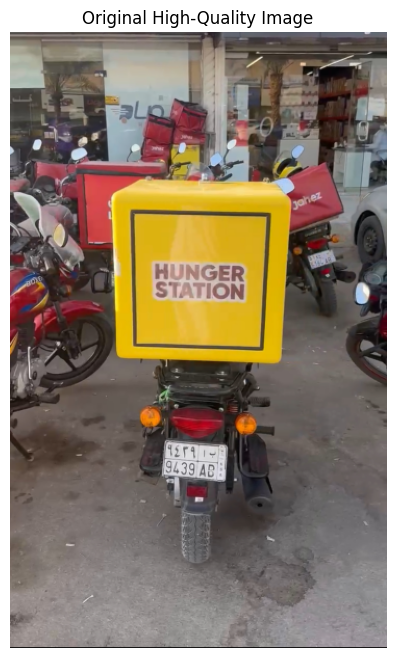


0: 640x416 1 License_plate, 1 MotorbikeDelivery, 13.4ms
Speed: 2.7ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


9439148
None
Violation detected: in_red_lane. Image saved at /kaggle/working/violation.jpg.
No license plate detected, email not sent.
Motorbike is in the red lane (violation).


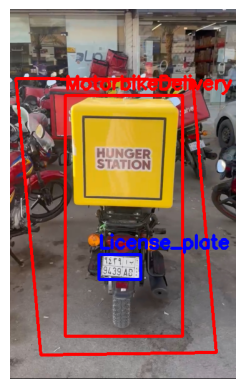

In [12]:
# Load YOLO model
model = YOLO('/kaggle/input/yolo-model-s-100/yolov8_motorbikes_detection_s.pt')

# Load image with high quality and handle errors
image_path = '/kaggle/input/test-final-down-png/test final down.png'

# Check if the file exists before reading
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found at path: {image_path}")

# Load the image using OpenCV
image = cv2.imread(image_path)

# Ensure the image is not empty
if image is None:
    raise ValueError(f"Failed to load image from: {image_path}")

# Convert to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original high-quality image to ensure it's loaded correctly
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original High-Quality Image')
plt.show()

# Define the red lane polygon
# red_lane = np.array([[670,841], [569,519], [822,504], [1504,827]], np.int32)
red_lane = np.array([[330,550], [49,554], [9,111], [292,113]], np.int32)


# Draw lane polygons
cv2.polylines(image, [red_lane], isClosed=True, color=(0, 0, 255), thickness=3)

font_path = "/kaggle/input/fontss/alfont_com_arial-1.ttf"

# Perform detection using YOLO
results = model.track(image)

# Initialize variables
helmet_detected = False
no_helmet_detected = False
in_red_lane = False
license_text = False
filtered_text = False
violation_image_path = '/kaggle/working/violation.jpg'
city = 'Riyadh'  # Assuming city is Riyadh for now

# Process detection results
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    label = model.names[int(box.cls)]
    color = class_colors[int(box.cls)]

    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    if label == 'Helmet':
        helmet_detected = True
    elif label == 'No_Helmet':
        no_helmet_detected = True

    motorbike_center = ((x1 + x2) // 2, (y1 + y2) // 2)
    if cv2.pointPolygonTest(red_lane, motorbike_center, False) >= 0:
        in_red_lane = True

    if label == 'License_plate':
        license_plate_img = image[y1:y2, x1:x2]

        # Apply sharpening to the license plate
        license_plate_sharpened = sharpen_image(license_plate_img)
        
        # Apply thresholding (optional)
        license_plate_thresh = apply_threshold(license_plate_sharpened)
        
        # Convert the thresholded image (2D) back to RGB (3D)
        license_plate_rgb = cv2.cvtColor(license_plate_thresh, cv2.COLOR_GRAY2RGB)
        
        # Resize for better OCR
        license_plate_resized = cv2.resize(license_plate_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        # Convert the thresholded, resized license plate to PIL format
        license_plate_pil = Image.fromarray(license_plate_resized)
        
        # Save the image for inspection if needed
        temp_image_path = '/kaggle/working/license_plate.png'
        license_plate_pil.save(temp_image_path)

        # Perform OCR on the thresholded, resized license plate image using TrOCR
#         pixel_values = processor(images=license_plate_pil, return_tensors="pt").pixel_values.to('cuda')
        license_plate_text = model_ocr.chat(processor, temp_image_path, ocr_type='ocr')
#         license_plate_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)[0]
        print(license_plate_text)
        # Process and filter the license plate text
        filtered_text = filter_license_plate_text(license_plate_text)
        print(filtered_text)

        if filtered_text:
            arabic_text = convert_to_arabic(filtered_text)
            license_number, license_letters = filtered_text.split()
            image = draw_text_pil(image, filtered_text, (x1, y2 + 30), font_path, font_size=30, color=(255, 255, 255))
            image = draw_text_pil(image, arabic_text, (x1, y2), font_path, font_size=30, color=(0, 255, 0))

# Determine violation type
violation_type = None
if no_helmet_detected and in_red_lane:
    violation_type = 'no_helmet_in_red_lane'
elif no_helmet_detected:
    violation_type = 'no_helmet'
elif in_red_lane:
    violation_type = 'in_red_lane'

if violation_type:
    cv2.imwrite(violation_image_path, image)
    print(f"Violation detected: {violation_type}. Image saved at {violation_image_path}.")

    if filtered_text:
        save_detection_to_db(city, license_number, license_letters, in_red_lane, no_helmet_detected, violation_image_path)
        send_email(filtered_text + " / " + arabic_text, violation_image_path, violation_type)
    else:
        print("No license plate detected, email not sent.")
else:
    print("No violation detected.")

if helmet_detected:
    print("Helmet is being worn.")
if no_helmet_detected:
    print("No helmet is being worn.")
if in_red_lane:
    print("Motorbike is in the red lane (violation).")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [13]:
license_plate_text = model_ocr.chat(processor, '/kaggle/input/test-down-2-png-high-quality/test down 2.png', ocr_type='ocr')
print(license_plate_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


HUNGER
